In [378]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [379]:
import zipfile

with zipfile.ZipFile("/content/playground-series-s5e7.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/playground-series-s5e7")


In [380]:
df=pd.read_csv('/content/playground-series-s5e7/train.csv')

In [381]:
df=df.drop(columns=['id'])

In [382]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [383]:
df.shape

(18524, 8)

In [384]:
df.isnull().mean()*100


,0
Time_spent_Alone,6.424098
Stage_fear,10.219175
Social_event_attendance,6.370114
Going_outside,7.914057
Drained_after_socializing,6.202764
Friends_circle_size,5.689916
Post_frequency,6.823580
Personality,0.000000


In [385]:
df.head(3)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert


In [386]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [388]:
numeric_cols=df.select_dtypes(include=['number'])
cat_cols=df.select_dtypes(include=['object'])

In [389]:
numeric_cols=numeric_cols.fillna(numeric_cols.mean())
for i in cat_cols:
  cat_cols[i]=cat_cols[i].fillna(cat_cols[i].mode()[0])

In [390]:
df=pd.concat([numeric_cols,cat_cols],axis=1)

In [391]:
df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Personality
0,0.000000,6.0,4.0,15.0,5.000000,No,No,Extrovert
1,1.000000,7.0,3.0,10.0,8.000000,No,No,Extrovert
2,6.000000,1.0,0.0,3.0,0.000000,Yes,No,Introvert
3,3.000000,7.0,3.0,11.0,5.000000,No,No,Extrovert
4,1.000000,4.0,4.0,13.0,4.982097,No,No,Extrovert
...,...,...,...,...,...,...,...,...
18519,3.000000,7.0,3.0,9.0,7.000000,No,No,Extrovert
18520,1.000000,6.0,7.0,6.0,5.000000,No,No,Extrovert
18521,7.000000,1.0,1.0,1.0,4.982097,Yes,Yes,Introvert
18522,3.137764,1.0,0.0,5.0,2.000000,Yes,Yes,Introvert


In [392]:
df.isnull().sum()

,0
Time_spent_Alone,0
Social_event_attendance,0
Going_outside,0
Friends_circle_size,0
Post_frequency,0
Stage_fear,0
Drained_after_socializing,0
Personality,0


# **EDA**

# **Density plot**

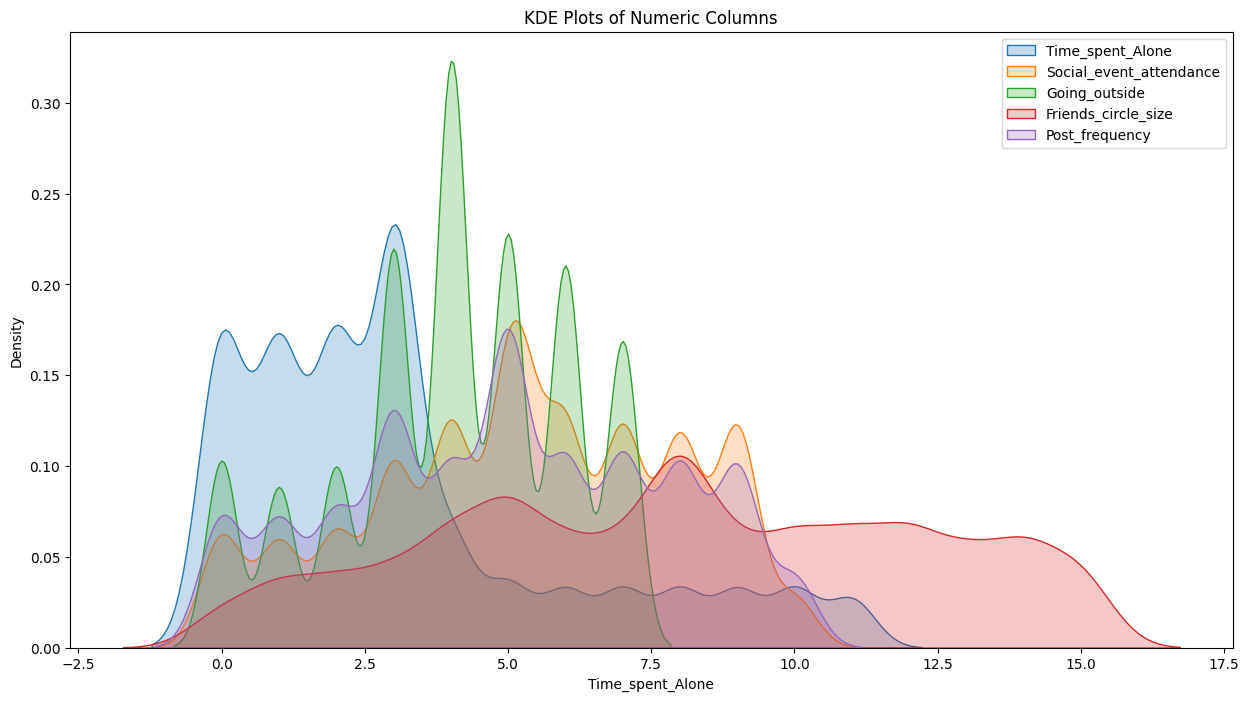

In [393]:
plt.figure(figsize=(15, 8))
for col in numeric_cols:
    sns.kdeplot(df[col], fill=True, label=col)
plt.title("KDE Plots of Numeric Columns")
plt.legend()
plt.show()

# **Histogram**

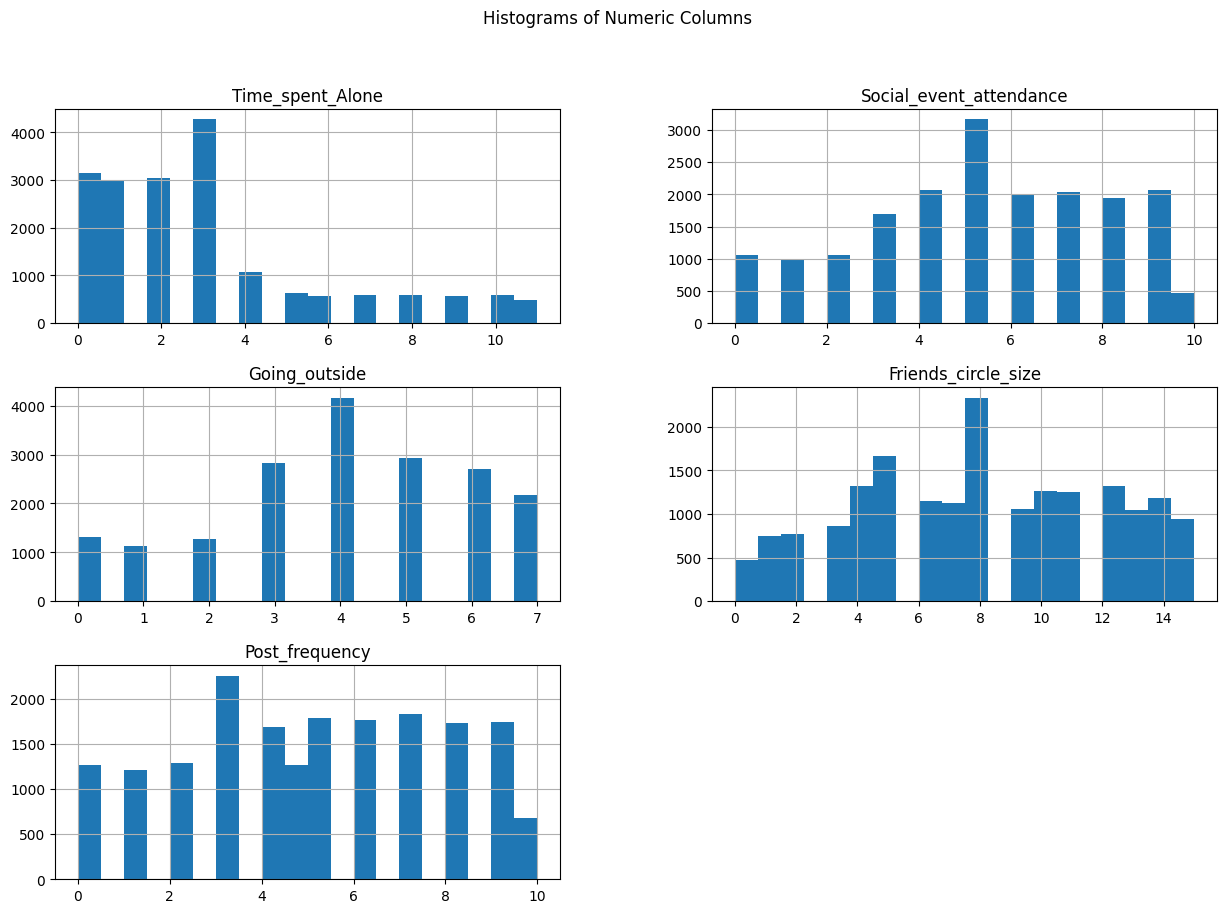

In [394]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

# **Count plot**

<Axes: xlabel='Stage_fear', ylabel='count'>

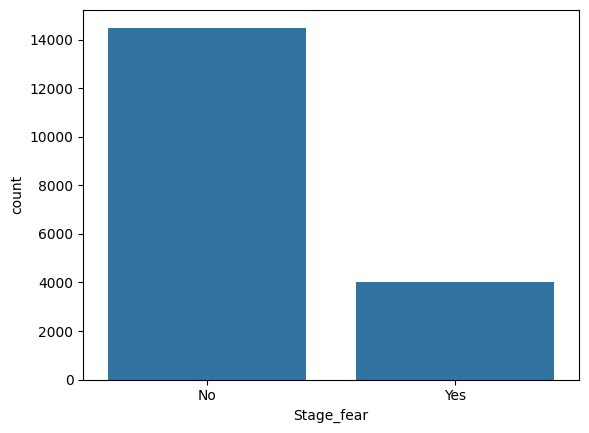

In [395]:
sns.countplot(x=df['Stage_fear'])


<Axes: xlabel='Drained_after_socializing', ylabel='count'>

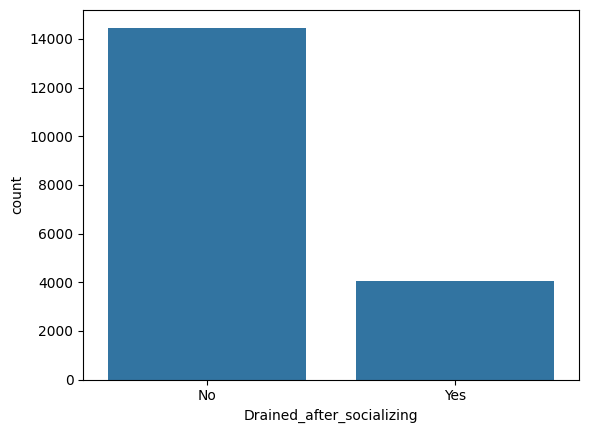

In [396]:
sns.countplot(x=df['Drained_after_socializing'])

<Axes: xlabel='Personality', ylabel='count'>

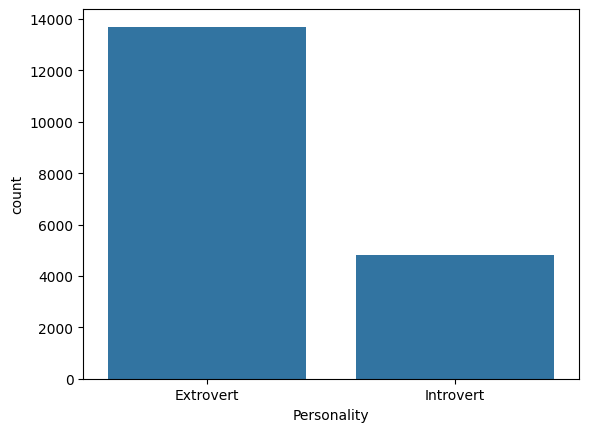

In [397]:
sns.countplot(x=df['Personality'])

# **Heatmap**

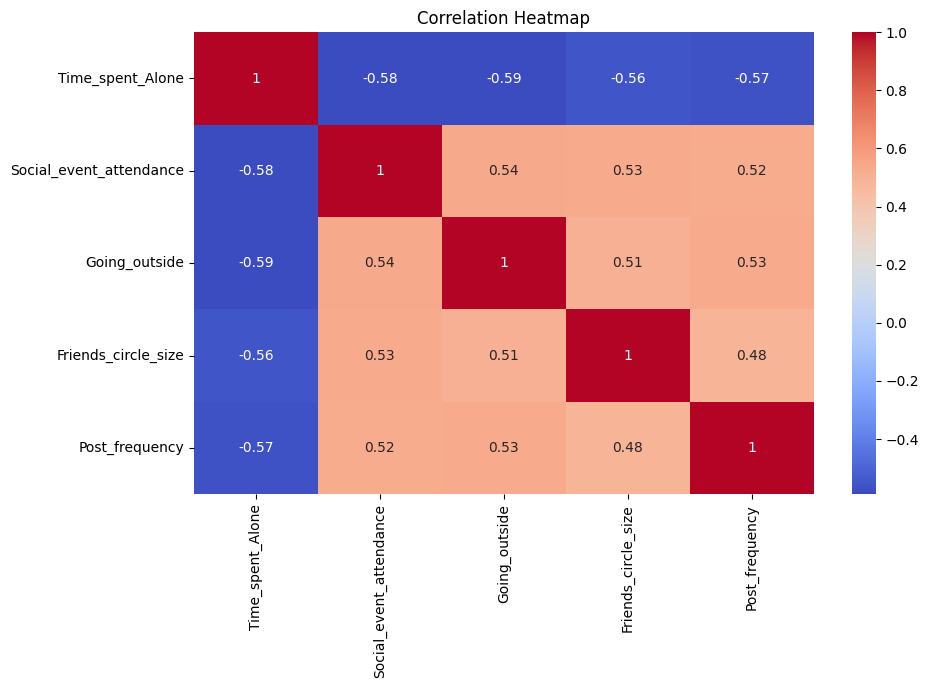

In [398]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# **Box plot**

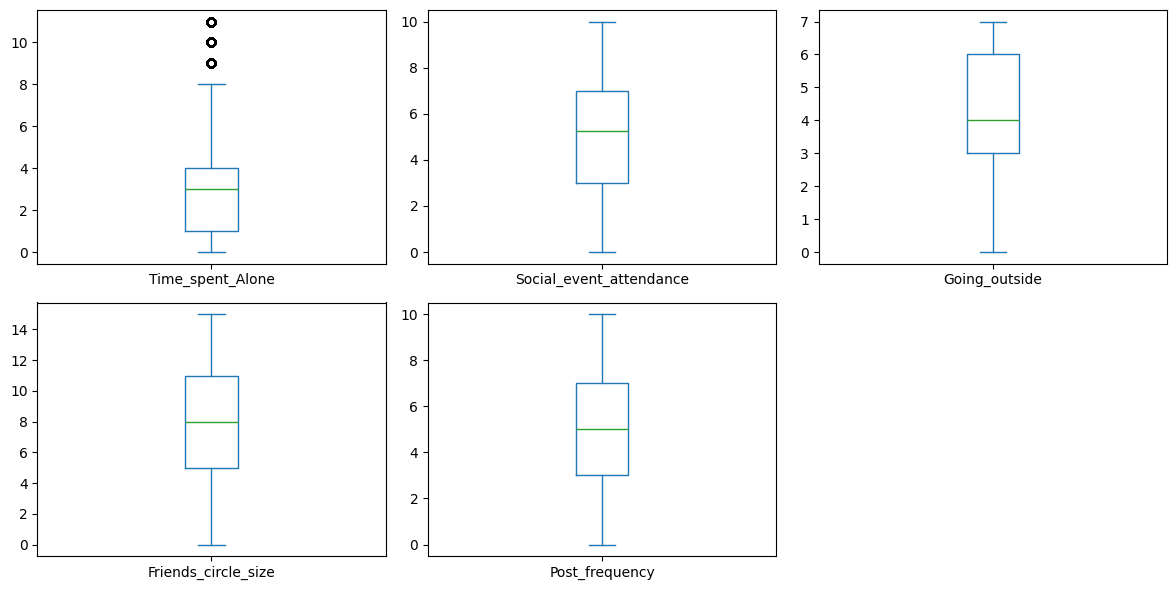

In [399]:
df[numeric_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 6))
plt.tight_layout()
plt.show()


In [400]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [401]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [418]:
y

array([0, 0, 1, ..., 1, 1, 0])

In [402]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [403]:
categorical_features=df[['Stage_fear','Drained_after_socializing']]

In [404]:
from sklearn.preprocessing import OneHotEncoder

In [405]:
from sklearn.compose import ColumnTransformer
processor=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse_output=False),categorical_features.columns)
],force_int_remainder_cols=False
)

In [406]:
x_train.shape

(11114, 7)

# **Random Forest**

In [407]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
final_processor=Pipeline([
    ('proessor',processor),
    ('rf',RandomForestClassifier())
])

In [408]:
# train.py (example training script)
final_processor.fit(x_train, y_train)

import pickle
with open("pipeline.pkl", "wb") as f:
    pickle.dump(final_processor, f)


In [409]:
y_pred=pipeline.predict(x_test)

In [410]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix

In [411]:
print(accuracy_score(y_test,y_pred)*100)

96.57219973009447


In [412]:
print(f1_score(y_test,y_pred)*100)

93.19399785637728


In [413]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

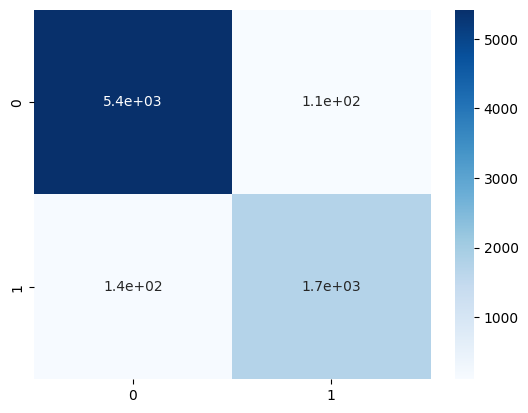

In [414]:
sns.heatmap(cm,annot=True,cmap='Blues')

In [415]:
# 1. Fit the pipeline
final_processor.fit(x_train, y_train)

# 2. Save the fitted pipeline
import pickle
with open("pipeline.pkl", "wb") as f:
    pickle.dump(final_processor, f)

# 3. Load it back later
with open("pipeline.pkl", "rb") as f:
    loaded_pipeline = pickle.load(f)

# 4. Use directly for prediction
y_pred = loaded_pipeline.predict(x_test)
